In [62]:
### Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

NameError: name 'sum_df' is not defined

In [42]:
# List for holding coordinates, city, and country
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

621


In [43]:
#base url
url = 'http://api.openweathermap.org/data/2.5/weather?'
#set units to pull data
units = 'imperial'
#build partial query url
query_url = f'{url}appid={weather_api_key}&units={units}&q='

In [44]:
#set up lists to hold response info
city_name = []
country = []
city_id = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

#set counter to store records
record_counter = 0
set_counter = 1

print('Beginning Data Retrieval')
print('------------------------')

#loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 1
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    try:
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        city_id.append(response['id'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except:
        print('City not found. Skipping...')
        pass
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

        
#print the length of each to to ensure they all have the same number of values
#print(len(city_name))
#print(len(city_id))
#print(len(lat))
#print(len(lng))
#print(len(temp))
#print(len(humidity))
#print(len(cloudiness))
#print(len(wind_speed))

Beginning Data Retrieval
------------------------
Processing record 1 of set 1 | albany
Processing record 2 of set 1 | punta arenas
Processing record 3 of set 1 | larnaca
Processing record 4 of set 1 | quemado de guines
Processing record 5 of set 1 | nome
Processing record 6 of set 1 | vaini
Processing record 7 of set 1 | mar del plata
Processing record 8 of set 1 | qaanaaq
Processing record 9 of set 1 | airai
Processing record 10 of set 1 | kapaa
Processing record 11 of set 1 | carnarvon
Processing record 12 of set 1 | port elizabeth
Processing record 13 of set 1 | abastumani
Processing record 14 of set 1 | busselton
Processing record 15 of set 1 | vaitupu
City not found. Skipping...
Processing record 16 of set 1 | sibolga
Processing record 17 of set 1 | le port
Processing record 18 of set 1 | taoudenni
Processing record 19 of set 1 | high level
Processing record 20 of set 1 | kaili
Processing record 21 of set 1 | rohri
Processing record 22 of set 1 | hambantota
Processing record 23 o

Processing record 40 of set 4 | haines junction
Processing record 41 of set 4 | mbandaka
Processing record 42 of set 4 | hendersonville
Processing record 43 of set 4 | kruisfontein
Processing record 44 of set 4 | mys shmidta
City not found. Skipping...
Processing record 45 of set 4 | ancud
Processing record 46 of set 4 | arlit
Processing record 47 of set 4 | wellington
Processing record 48 of set 4 | guerrero negro
Processing record 49 of set 4 | nioro
Processing record 50 of set 4 | kurumkan
Processing record 1 of set 5 | vanimo
Processing record 2 of set 5 | grindavik
Processing record 3 of set 5 | zhuanghe
Processing record 4 of set 5 | chapais
Processing record 5 of set 5 | kangaatsiaq
Processing record 6 of set 5 | pevek
Processing record 7 of set 5 | khatanga
Processing record 8 of set 5 | puerto gaitan
Processing record 9 of set 5 | ewa beach
Processing record 10 of set 5 | mehamn
Processing record 11 of set 5 | attawapiskat
City not found. Skipping...
Processing record 12 of se

Processing record 29 of set 8 | comodoro rivadavia
Processing record 30 of set 8 | taldan
Processing record 31 of set 8 | jiangyou
Processing record 32 of set 8 | iskenderun
Processing record 33 of set 8 | ulladulla
Processing record 34 of set 8 | impfondo
Processing record 35 of set 8 | iguape
Processing record 36 of set 8 | general roca
Processing record 37 of set 8 | ola
Processing record 38 of set 8 | casablanca
Processing record 39 of set 8 | lolua
City not found. Skipping...
Processing record 40 of set 8 | novhorodka
Processing record 41 of set 8 | namatanai
Processing record 42 of set 8 | masallatah
Processing record 43 of set 8 | laramie
Processing record 44 of set 8 | angoche
Processing record 45 of set 8 | tamandare
Processing record 46 of set 8 | hami
Processing record 47 of set 8 | meyungs
City not found. Skipping...
Processing record 48 of set 8 | talcahuano
Processing record 49 of set 8 | acheng
Processing record 50 of set 8 | okhotsk
Processing record 1 of set 9 | naze
P

Processing record 17 of set 12 | pisco
Processing record 18 of set 12 | sarai
Processing record 19 of set 12 | haikou
Processing record 20 of set 12 | ilebo
Processing record 21 of set 12 | grand gaube
Processing record 22 of set 12 | kieta
Processing record 23 of set 12 | narrabri
Processing record 24 of set 12 | bosaso
Processing record 25 of set 12 | victor harbor
Processing record 26 of set 12 | falam
Processing record 27 of set 12 | sungurlu
Processing record 28 of set 12 | tura
Processing record 29 of set 12 | mantua
Processing record 30 of set 12 | natal
Processing record 31 of set 12 | ojinaga
Processing record 32 of set 12 | nam tha
City not found. Skipping...
Processing record 33 of set 12 | kaitong
Processing record 34 of set 12 | waitati
Processing record 35 of set 12 | laguna
Processing record 36 of set 12 | whitehorse
Processing record 37 of set 12 | coracora
Processing record 38 of set 12 | warqla
City not found. Skipping...
Processing record 39 of set 12 | skjold
Proces

In [45]:
print(len(city_name))

571


In [46]:
#create dataframe from the data pulled above
weather_dict = {
    'city': city_name,
    'country': country,
    'id': city_id,
    'lat': lat,
    'lng': lng,
    'temp': temp,
    'humidity': humidity,
    'clouds': cloudiness,
    'wind_speed': wind_speed
}    
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file, index=False)

In [47]:
#pull individual column data for scatter plots
lat_values = weather_data['lat']
temp_values = weather_data['temp']
humidity_values = weather_data['humidity']
clouds_values = weather_data['clouds']
wind_speed_values = weather_data['wind_speed']

# Scatter Plots

The r-squared is: -0.7803474301176426


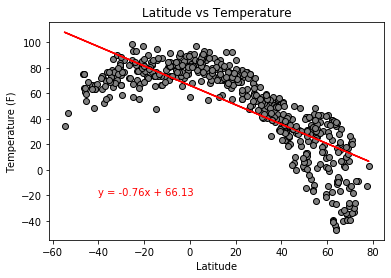

In [48]:
#latitude vs temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, temp_values)
regress_values = lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(lat_values, temp_values, marker='o', facecolors='grey', edgecolors='black')
plt.plot(lat_values, regress_values, 'r-')
plt.annotate(line_eq,(-40,-20), fontsize=10, color='red')
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/lat_temp_plt.png')

The r-squared is: 0.21330838323649706


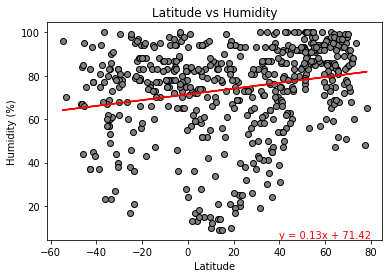

In [49]:
#latitude vs humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, humidity_values)
regress_values = lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(lat_values, humidity_values, marker='o', facecolors='grey', edgecolors='black')
plt.plot(lat_values, regress_values, 'r-')
plt.annotate(line_eq,(40,5), fontsize=10, color='red')
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/lat_hum_plt.png')

The r-squared is: 0.049374190465763156


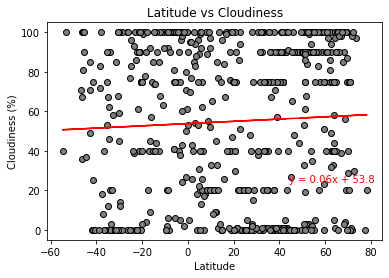

In [50]:
#latitude vs cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, clouds_values)
regress_values = lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(lat_values, clouds_values, marker='o', facecolors='grey', edgecolors='black')
plt.plot(lat_values, regress_values, 'r-')
plt.annotate(line_eq,(44,24), fontsize=10, color='red')
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/lat_cloud_plt.png')

The r-squared is: 0.016797490316259697


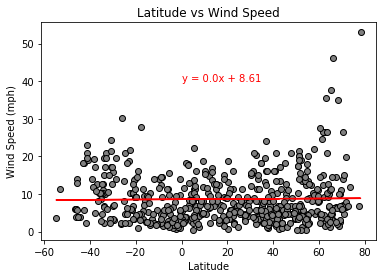

In [51]:
#latitude vs wind speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, wind_speed_values)
regress_values = lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(lat_values, wind_speed_values, marker='o', facecolors='grey', edgecolors='black')
plt.plot(lat_values, regress_values, 'r-')
plt.annotate(line_eq,(0,40), fontsize=10, color='red')
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/lat_wind_plt.png')

# Hemisphere Scatter Plots

In [52]:
#locate the data with a latitude value equal to or greater than 0 for northern hemisphere
north_hem = weather_data.loc[weather_data['lat'] >= 0]
#locate the data with a latitude value less than 0 for southern hemisphere
south_hem = weather_data.loc[weather_data['lat'] < 0]

In [53]:
#pull individual column data for scatter plots based on hemisphere
north_temp = north_hem['temp']
south_temp = south_hem['temp']
north_lat = north_hem['lat']
south_lat = south_hem['lat']
north_humid = north_hem['humidity']
south_humid = south_hem['humidity']
north_clouds = north_hem['clouds']
south_clouds = south_hem['clouds']
north_wind = north_hem['wind_speed']
south_wind = south_hem['wind_speed']

The r-squared is: -0.8769675209891498


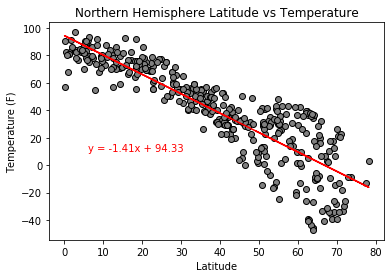

In [54]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(north_lat, north_temp, marker='o', facecolors='grey', edgecolors='black')
plt.plot(north_lat, regress_values, 'r-')
plt.annotate(line_eq,(6,10), fontsize=10, color='red')
plt.title('Northern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/01_north_lat_temp.png')

The r-squared is: 0.5095942501417622


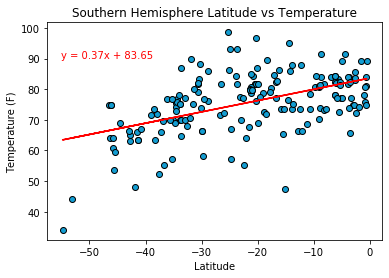

In [55]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(south_lat, south_temp, marker='o', facecolors='#139dd2', edgecolors='black')
plt.plot(south_lat, regress_values, 'r-')
plt.annotate(line_eq,(-55,90), fontsize=10, color='red')
plt.title('Southern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/01_south_lat_temp.png')

The r-squared is: 0.4222796874101895


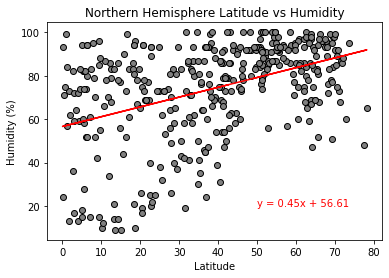

In [56]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humid)
regress_values = north_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(north_lat, north_humid, marker='o', facecolors='grey', edgecolors='black')
plt.plot(north_lat, regress_values, 'r-')
plt.annotate(line_eq,(50,20), fontsize=10, color='red')
plt.title('Northern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/02_north_lat_humid.png')

The r-squared is: 0.23304529259841955


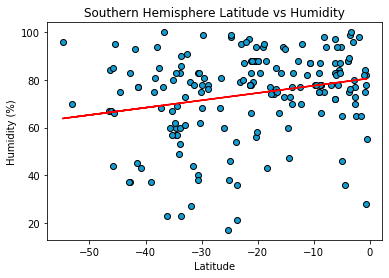

In [57]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(south_lat, south_humid, marker='o', facecolors='#139dd2', edgecolors='black')
plt.plot(south_lat, regress_values, 'r-')
plt.annotate(line_eq,(-20,10), fontsize=10, color='red')
plt.title('Southern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/02_south_lat_humid.png')

The r-squared is: 0.1854990469966369


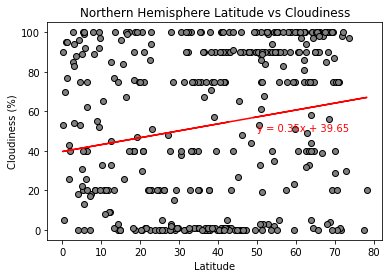

In [58]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_clouds)
regress_values = north_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(north_lat, north_clouds, marker='o', facecolors='grey', edgecolors='black')
plt.plot(north_lat, regress_values, 'r-')
plt.annotate(line_eq,(50,50), fontsize=10, color='red')
plt.title('Northern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/03_north_lat_cloud.png')

The r-squared is: 0.20536507061644987


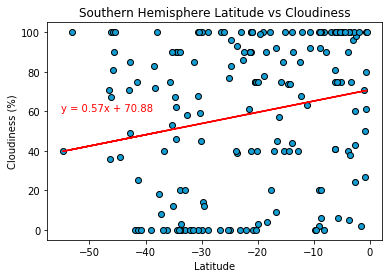

In [59]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_clouds)
regress_values = south_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(south_lat, south_clouds, marker='o', facecolors='#139dd2', edgecolors='black')
plt.plot(south_lat, regress_values, 'r-')
plt.annotate(line_eq,(-55,60), fontsize=10, color='red')
plt.title('Southern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/03_south_lat_cloud.png')

The r-squared is: 0.14033173103610458


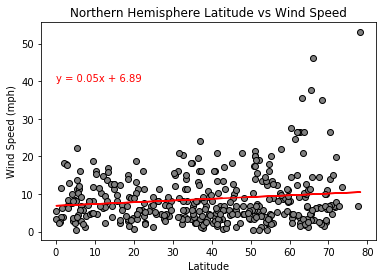

In [60]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(north_lat, north_wind, marker='o', facecolors='grey', edgecolors='black')
plt.plot(north_lat, regress_values, 'r-')
plt.annotate(line_eq,(0,40), fontsize=10, color='red')
plt.title('Northern Hemisphere Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/04_north_lat_wind.png')

The r-squared is: -0.374252639536216


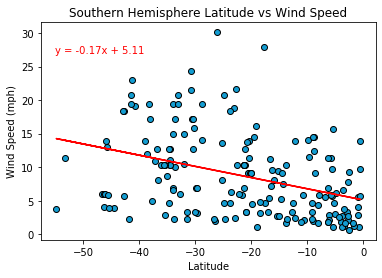

In [61]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(south_lat, south_wind, marker='o', facecolors='#139dd2', edgecolors='black')
plt.plot(south_lat, regress_values, 'r-')
plt.annotate(line_eq,(-55,27), fontsize=10, color='red')
plt.title('Southern Hemisphere Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/04_south_lat_wind.png')